# Image compressing with kmeans

In [114]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Reading the image and reshaping**

(1331, 2000, 3)
(2662000, 3)


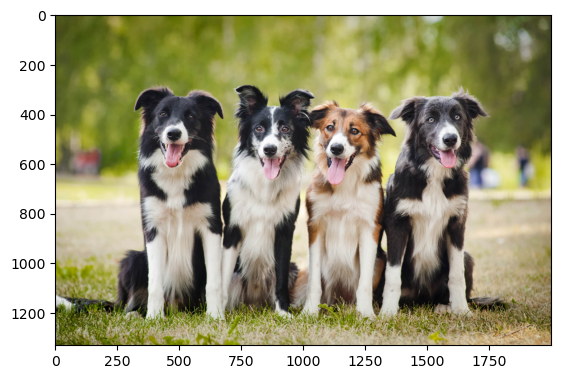

In [115]:
img = io.imread('dog-day1.jpg')
print(img.shape)
rows = img.shape[0]
cols = img.shape[1]
dog = img.reshape((rows*cols,3))
print(dog.shape)

plt.imshow(img)
plt.show()

**Running kmeans**

In [116]:
km = KMeans(n_clusters=64)

y_km = km.fit(dog)
x_km = km.fit_predict(dog)

**Plotting clusters**

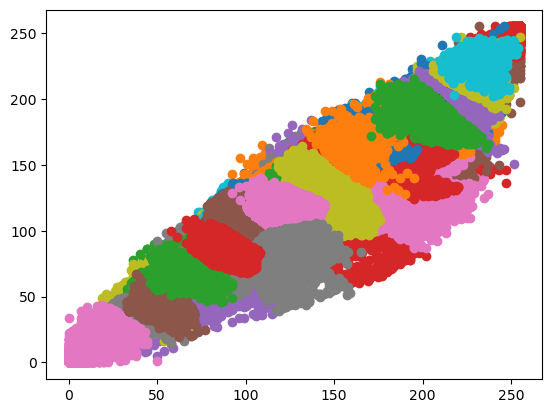

In [124]:
labels = np.unique(x_km)

for i in labels:
    plt.scatter(dog[x_km == i , 0] , dog[x_km == i , 1] , label = i)

plt.show()

**Assigning pixels to nearest centroids**

In [118]:
compressed_dog = y_km.cluster_centers_[y_km.labels_]
compressed_dog = np.clip(compressed_dog.astype('uint8'), 0, 255)

**Reshaping image to original values**

In [119]:
compressed_dog = compressed_dog.reshape(rows, cols, 3)

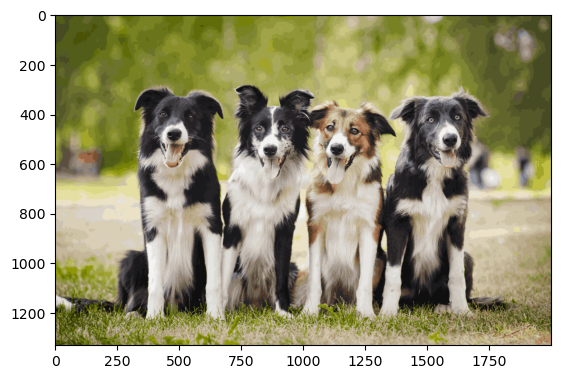

In [120]:
plt.imshow(compressed_dog)